# Classification in Sci-kit Learn

This code predicts the newsgroup from a list of 20 possible news groups. Its trainind on the commonly used 20-newsgroups dataset that is a "unusual" clasification dataset in that each newsgroup is very distinctive, leading to picking models that do better with this kind of data.

The code does the following:
1. counts words 
2. weights word count features with TFIDF weighting 
3. predicts the newsgroup from the weighted features

Models are optimized through:
1. Varying tokenization methods including character and word n-grams
2. Several model types
3. Randomized hyperparameter and tokenization option search
4. Ranking of several models so best models are visible

Code came from examples at:
1. http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
2. http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html

20 newsgroups dataset info is at http://scikit-learn.org/stable/datasets/index.html#the-20-newsgroups-text-dataset

Be sure to install the following (pip3 is python 3 and pip command will also work):
1. `pip3 install sklearn`
2. `pip3 install pandas`
2. `pip3 install scipy`

If I missed an instal and you get an import error, try doing a `pip3 install <import name>` . Note that the kernel for jupyter needs to be the same version/instalation of python you do the pip3 install in (python 3). 

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.core.display import display, HTML
from IPython.display import Audio
import os

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

import time
display(HTML("<style>.container { width:97% !important; }</style>")) #Set width of iPython cells

# Load Data

In [2]:
from sklearn.datasets import fetch_20newsgroups
# You can restrict the categories to simulate fewwer classes
#categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
#categories = ['comp.graphics', 'sci.med']
#categories = ['alt.atheism', 'talk.religion.misc']
categories=None
twenty_train = fetch_20newsgroups(subset='train',
    categories=categories, shuffle=True, random_state=42)

twenty_test = fetch_20newsgroups(subset='test',
    categories=categories, shuffle=True, random_state=42)

# Investigate Training Set

In [3]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
len(twenty_train.data)

11314

In [5]:
len(twenty_train.filenames)

11314

In [6]:
print(twenty_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [7]:
twenty_train.target_names[twenty_train.target[0]]

'rec.autos'

In [8]:
twenty_train.target

array([7, 4, 4, ..., 3, 1, 8])

In [9]:
len(twenty_train.target)

11314

In [10]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# Test Set

In [74]:
len(twenty_test.data)

7532

In [75]:
len(twenty_test.data) / len(twenty_train.data)

0.66572388191621

In [11]:
print(twenty_test.data[10])

From: Greg.Reinacker@FtCollins.NCR.COM
Subject: Windows On-Line Review uploaded
Reply-To: Greg.Reinacker@FtCollinsCO.NCR.COM
Organization: NCR Microelectronics, Ft. Collins, CO
Lines: 12

I have uploaded the Windows On-Line Review shareware edition to
ftp.cica.indiana.edu as /pub/pc/win3/uploads/wolrs7.zip.

It is an on-line magazine which contains reviews of some shareware
products...I grabbed it from the Windows On-Line BBS.

--
--------------------------------------------------------------------------
Greg Reinacker                          (303) 223-5100 x9289
NCR Microelectronic Products Division   VoicePlus 464-9289
2001 Danfield Court                     Greg.Reinacker@FtCollinsCO.NCR.COM
Fort Collins, CO  80525



In [12]:
twenty_test.target_names[twenty_test.target[10]]

'comp.os.ms-windows.misc'

## Test Tokenization
[CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) 

In [80]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
print('training examples = ' + str(len(twenty_train.data)))
print('vocabulary length = ' + str(len(count_vect.vocabulary_)))
print('transformed training text matrix shape = ' + str(X_train_counts.shape))



training examples = 11314
vocabulary length = 130107
transformed matrix shape = (11314, 130107)


In [14]:
# vocabulary_ is dict of word string -> word index
list(count_vect.vocabulary_.items())[:50]

[('from', 56979),
 ('lerxst', 75358),
 ('wam', 123162),
 ('umd', 118280),
 ('edu', 50527),
 ('where', 124031),
 ('my', 85354),
 ('thing', 114688),
 ('subject', 111322),
 ('what', 123984),
 ('car', 37780),
 ('is', 68532),
 ('this', 114731),
 ('nntp', 87620),
 ('posting', 95162),
 ('host', 64095),
 ('rac3', 98949),
 ('organization', 90379),
 ('university', 118983),
 ('of', 89362),
 ('maryland', 79666),
 ('college', 40998),
 ('park', 92081),
 ('lines', 76032),
 ('15', 4605),
 ('was', 123292),
 ('wondering', 124931),
 ('if', 65798),
 ('anyone', 28615),
 ('out', 90774),
 ('there', 114579),
 ('could', 42876),
 ('enlighten', 51793),
 ('me', 80638),
 ('on', 89860),
 ('saw', 104813),
 ('the', 114455),
 ('other', 90686),
 ('day', 45295),
 ('it', 68766),
 ('door', 48618),
 ('sports', 109581),
 ('looked', 76718),
 ('to', 115475),
 ('be', 32311),
 ('late', 74693),
 ('60s', 16574),
 ('early', 50111),
 ('70s', 18299),
 ('called', 37433)]

# Test transform on some short text

In [91]:
text = ['The The rain in spain.', 'The brown brown fox.']
counts_matrix = count_vect.transform(text)
type(counts_matrix)

scipy.sparse.csr.csr_matrix

In [92]:
counts_matrix.data

array([1, 1, 1, 2, 2, 1, 1])

In [93]:
counts_matrix.indptr

array([0, 4, 7], dtype=int32)

In [94]:
counts_matrix.indices

array([ 66608,  99121, 109111, 114455,  35194,  56573, 114455], dtype=int32)

## Convert to coo sparce matrix for easier display

In [95]:
from scipy.sparse import coo_matrix
coo = coo_matrix(counts_matrix)
#print(np.stack((coo.row, coo.col, coo.data)))

df = pd.DataFrame({'row':coo.row, 'column':coo.col, 'count':coo.data}, 
                  columns=['row','column', 'count'])

df

,row,column,count
0,0,66608,1
1,0,99121,1
2,0,109111,1
3,0,114455,2
4,1,35194,2
5,1,56573,1
6,1,114455,1


## Build inverse vocabulary

In [96]:
inverse_vocabulary=np.empty(len(count_vect.vocabulary_), dtype=object)
for key,value in count_vect.vocabulary_.items():
    inverse_vocabulary[value] = key
    
for i in coo.col:
    print(i, inverse_vocabulary[i])

66608 in
99121 rain
109111 spain
114455 the
35194 brown
56573 fox
114455 the


In [104]:
words = [inverse_vocabulary[i] for i in coo.col]
df = pd.DataFrame({'row':coo.row, 'column':coo.col, 'count':coo.data, 'word':words})
df = df[ ['row','column', 'count', 'word'] ]
df

,row,column,count,word
0,0,66608,1,in
1,0,99121,1,rain
2,0,109111,1,spain
3,0,114455,2,the
4,1,35194,2,brown
5,1,56573,1,fox
6,1,114455,1,the


# TFIDF 
[TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)


In [110]:
tfidf = TfidfTransformer()
tfidf.fit(X_train_counts) # compute weights on whole training set
tfidf_matrix = tfidf.transform(counts_matrix) # transform examples
print( 'tfidf_matrix type = ' + str(type(tfidf_matrix)) )
print( 'tfidf_matrix shape = ' + str(tfidf_matrix.shape) )

coo_tfidf = coo_matrix(tfidf_matrix)
words_tfidf = [inverse_vocabulary[i] for i in coo_tfidf.col]

df = pd.DataFrame({'row':coo_tfidf.row, 'column':coo_tfidf.col, 
                   'value':coo_tfidf.data, 'word':words_tfidf})
df = df[ ['row','column', 'value', 'word'] ]
df

tfidf_matrix type = <class 'scipy.sparse.csr.csr_matrix'>
tfidf_matrix shape = (2, 130107)


,row,column,value,word
0,0,114455,0.214719,the
1,0,109111,0.759340,spain
2,0,99121,0.602864,rain
3,0,66608,0.117698,in
4,1,114455,0.085361,the
5,1,56573,0.524809,fox
6,1,35194,0.846929,brown


In [116]:
import scipy
scipy.sparse.linalg.norm(tfidf_matrix, axis=1)

array([ 1.,  1.])

Notice the following in the above values:
1. frequent words like 'the' and 'in' are down weighted
2. Each matrix row has a euclidian norm of 1.0

### Tfidf Weights

In [127]:
tfidf.idf_.shape

(130107,)

In [125]:
words = ['the', 'very', 'car', 'vector', 'africa']
for word in words:
    word_index = count_vect.vocabulary_[word]
    print(word + ' = ' + str(tfidf.idf_[word_index]))

for = 1.31349477005
the = 1.06905600081
very = 2.72055957853
car = 3.98125516175
vector = 7.1150087332
africa = 6.48373695636


# Pipelines
Pipelines pass the output of one transform to the input of the next.

[Pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In [22]:
text_clf = Pipeline([('cvect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('sgdc', MultinomialNB()),
                    ])

In [23]:
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
     steps=[('cvect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...near_tf=False, use_idf=True)), ('sgdc', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [24]:
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target) 

0.7738980350504514

In [26]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
     target_names=twenty_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.73      0.72      0.72       319
           comp.graphics       0.80      0.70      0.74       389
 comp.os.ms-windows.misc       0.73      0.76      0.75       394
comp.sys.ibm.pc.hardware       0.71      0.70      0.70       392
   comp.sys.mac.hardware       0.83      0.81      0.82       385
          comp.windows.x       0.83      0.77      0.80       395
            misc.forsale       0.84      0.90      0.87       390
               rec.autos       0.92      0.89      0.91       396
         rec.motorcycles       0.92      0.96      0.94       398
      rec.sport.baseball       0.89      0.90      0.89       397
        rec.sport.hockey       0.88      0.99      0.93       399
               sci.crypt       0.83      0.96      0.89       396
         sci.electronics       0.83      0.60      0.70       393
                 sci.med       0.87      0.86      0.86       396
         

In [27]:
df = pd.DataFrame(metrics.confusion_matrix(twenty_test.target, predicted))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,230,0,0,1,0,2,1,0,1,3,0,2,1,11,5,41,2,8,1,10
1,3,272,21,11,7,25,4,1,3,4,3,9,4,3,9,3,2,4,0,1
2,1,9,301,26,10,13,2,0,0,7,2,9,1,2,7,1,0,1,1,1
3,3,9,27,274,22,3,12,3,4,1,1,4,19,2,4,0,1,2,1,0
4,0,5,8,26,313,2,9,0,1,4,1,3,6,1,1,0,2,1,2,0
5,1,29,39,1,2,304,2,0,1,1,1,3,1,1,7,1,1,0,0,0
6,0,2,0,14,4,0,352,6,1,1,2,1,2,2,2,0,1,0,0,0
7,1,1,0,2,1,0,10,354,8,2,0,0,10,0,3,0,3,0,1,0
8,0,0,0,1,0,0,4,6,384,2,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,2,0,4,0,0,358,31,0,0,0,0,0,1,1,0,0


# Function to Test a Pipeline

In [208]:
class QAResults:
    def init(self, Y_expected, Y_predicted, X, class_labels):
        self.Y_expected = Y_expected
        self.Y_predicted = Y_predicted
        self.X = X
        self.class_labels = class_labels
        self.next_error_index = 0
        self.errors = np.nonzero(Y_expected - Y_predicted) # returns indexs of non-zero elements
        print(self.errors)
        
    def display_next(self):
        if(self.next_error_index >= self.errors[0].shape[0]):
            self.next_error_index = 0 # cycle back around
        X_index = self.errors[0][self.next_error_index]
        print('index = ', X_index )
        print('Expected = ' + self.class_labels[self.Y_expected[X_index]])
        print('Predicted = ' + self.class_labels[self.Y_predicted[X_index]])
        print('\nX['+ str(X_index) +']')
        print( self.X[X_index] )
        self.next_error_index +=1
        

In [209]:
def header(str):
    display(HTML('<h3>'+str+'</h3>'))

tests = {}

def test_pipeline(pipeline, name=None, verbose=True, qa_test = None):
    start=time.time()
    pipeline.fit(twenty_train.data, twenty_train.target)  
    predicted = pipeline.predict(twenty_test.data)
    elapsed_time = (time.time() - start)
    accuracy = np.mean(predicted == twenty_test.target)
    f1 = metrics.f1_score(twenty_test.target, predicted, average='macro') 
    print( 'F1 = %.3f \nAccuracy = %.3f\ntime = %.3f sec.' % (f1, accuracy, elapsed_time))
    if(verbose):
        header('Classification Report')
        print(metrics.classification_report(twenty_test.target, predicted,
                 target_names=twenty_test.target_names, digits=3))
        header('Confusion Matrix (row=expected, col=predicted)')
        df = pd.DataFrame(metrics.confusion_matrix(twenty_test.target, predicted))
        df.columns = twenty_test.target_names
        df['Expected']=twenty_test.target_names
        df.set_index('Expected',inplace=True)
        display(df)
   
    if name is not None:
        tests[name]={'Name':name, 'Accuracy':accuracy, 'F1':f1, 'Time':elapsed_time, 
                     'Details':pipeline.get_params(deep=True)}
    
    if qa_test is not None:
        qa_test.init( twenty_test.target, predicted, twenty_test.data, twenty_test.target_names) 
    
qa_test=QAResults()
test_pipeline(text_clf, qa_test=qa_test)


F1 = 0.811 
Accuracy = 0.824
time = 4.851 sec.


                          precision    recall  f1-score   support

             alt.atheism      0.728     0.721     0.724       319
           comp.graphics      0.795     0.699     0.744       389
 comp.os.ms-windows.misc      0.732     0.764     0.748       394
comp.sys.ibm.pc.hardware      0.710     0.699     0.704       392
   comp.sys.mac.hardware      0.826     0.813     0.819       385
          comp.windows.x      0.831     0.770     0.799       395
            misc.forsale      0.838     0.903     0.869       390
               rec.autos      0.917     0.894     0.905       396
         rec.motorcycles      0.923     0.965     0.943       398
      rec.sport.baseball      0.886     0.902     0.894       397
        rec.sport.hockey      0.880     0.990     0.932       399
               sci.crypt      0.832     0.962     0.892       396
         sci.electronics      0.833     0.598     0.696       393
                 sci.med      0.865     0.859     0.862       396
         

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
Expected,,,,,,,,,,,,,,,,,,,,
alt.atheism,230,0,0,1,0,2,1,0,1,3,0,2,1,11,5,41,2,8,1,10
comp.graphics,3,272,21,11,7,25,4,1,3,4,3,9,4,3,9,3,2,4,0,1
comp.os.ms-windows.misc,1,9,301,26,10,13,2,0,0,7,2,9,1,2,7,1,0,1,1,1
comp.sys.ibm.pc.hardware,3,9,27,274,22,3,12,3,4,1,1,4,19,2,4,0,1,2,1,0
comp.sys.mac.hardware,0,5,8,26,313,2,9,0,1,4,1,3,6,1,1,0,2,1,2,0
comp.windows.x,1,29,39,1,2,304,2,0,1,1,1,3,1,1,7,1,1,0,0,0
misc.forsale,0,2,0,14,4,0,352,6,1,1,2,1,2,2,2,0,1,0,0,0
rec.autos,1,1,0,2,1,0,10,354,8,2,0,0,10,0,3,0,3,0,1,0
rec.motorcycles,0,0,0,1,0,0,4,6,384,2,0,0,0,1,0,0,0,0,0,0


(array([   1,    4,    7, ..., 7525, 7528, 7530]),)


In [218]:
qa_test.display_next()  # re-run this cell to see next error

index =  29
Expected = comp.sys.ibm.pc.hardware
Predicted = sci.space

X[29]
From: anderson@dseg.ti.com (John Anderson)
Subject: re: Gateway 2000 & Zeos compare
Organization: TI-DSEG Spring Creek
Nntp-Posting-Host: mcs-jha.dseg.ti.com
Reply-To: anderson@dseg.ti.com
Lines: 22

In article <1873@yetti.UUCP> cs902033@cs.yorku.ca (CHIN H LAM) writes:
>
> I am think of buying a new computer through the mail order, I am looking at
>the Gateway 2000 66V systen and the Zeos's system. Which is better (in terms of
>value, price, ungrade, service), because I am in canada, I wonder can i have
>the same level of service as in the states? 


I don't know about Canada, but I have heard from people
doing translation work in Papua New Quinea, that they
like them and have had good response on service.

Another is seriously considering buying one.


*********************************************************************
* John H. Anderson			     Texas Instruments Inc. *
* Internet:   anderson@dseg.ti.com	  

# Importance of TFIDF Weighting

In [133]:
test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),  # <-- with weighting
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-5, random_state=42,
                                            max_iter=40)),
                         ]), verbose=False)

F1 = 0.841 
Accuracy = 0.848
time = 12.549 sec.


In [134]:
test_pipeline(Pipeline([('cvect', CountVectorizer()),  # <-- no weighting
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-5, random_state=42,
                                            max_iter=40)),
                         ]), verbose=False)

F1 = 0.760 
Accuracy = 0.769
time = 12.203 sec.


# TfidfVectorizer combines CountVectorizer and TfidfTransformer

In [29]:
test_pipeline(Pipeline([('tfidf_v', TfidfVectorizer()),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 )),
                         ]), verbose=False)

F1 = 0.846 
Accuracy = 0.854
time = 8.709 sec.


In [30]:
test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 )),
                         ]), verbose=False, name='hinge loss')

F1 = 0.846 
Accuracy = 0.854
time = 8.706 sec.


# Hyper-parameter tests on [SGDClassifier]( http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [31]:
# hinge loss is a linear SVM
test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 )),
                         ]), verbose=False, name='hinge loss')

F1 = 0.846 
Accuracy = 0.854
time = 8.505 sec.


In [32]:
# log loss is logistic regression
test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', SGDClassifier(loss='log', penalty='l2',
                                            alpha=1e-6, random_state=42,
                                            max_iter=10 )),
                         ]), verbose=False, name='log loss')

F1 = 0.840 
Accuracy = 0.847
time = 6.046 sec.


In [33]:
test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', SGDClassifier(loss='log', penalty='none',
                                            alpha=1e-6, random_state=42,
                                            max_iter=10 )),
                         ]), verbose=False, name='log loss no regularization')

F1 = 0.819 
Accuracy = 0.825
time = 5.897 sec.


# Test Naive Bayes model
[MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

In [34]:
test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', MultinomialNB()),
                         ]), verbose=False, name='MultinomialNB')

F1 = 0.756 
Accuracy = 0.774
time = 4.417 sec.


# K-nearest neighbors model
[KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('knn', KNeighborsClassifier(n_neighbors=5)),
                         ]), verbose=False, name='KNN n=5')

F1 = 0.655 
Accuracy = 0.659
time = 12.966 sec.


In [36]:
from sklearn.neighbors import KNeighborsClassifier

for n in range(1,7):
    print( '\nn = ' + str(n))
    test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('knn', KNeighborsClassifier(n_neighbors=n)),
                         ]), verbose=False, name='KNN n=' + str(n))


n = 1
F1 = 0.667 
Accuracy = 0.672
time = 12.508 sec.

n = 2
F1 = 0.639 
Accuracy = 0.641
time = 12.870 sec.

n = 3
F1 = 0.656 
Accuracy = 0.658
time = 12.841 sec.

n = 4
F1 = 0.654 
Accuracy = 0.656
time = 12.933 sec.

n = 5
F1 = 0.655 
Accuracy = 0.659
time = 12.901 sec.

n = 6
F1 = 0.655 
Accuracy = 0.661
time = 12.919 sec.


In [37]:
from sklearn.neighbors import KNeighborsClassifier

for n in range(1,7):
    print( '\nn = ' + str(n))
    test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('knn', KNeighborsClassifier(n_neighbors=n, weights='distance')),
                         ]), verbose=False, name='KNN n=' + str(n) + ' distance weights')
    


n = 1
F1 = 0.667 
Accuracy = 0.672
time = 12.326 sec.

n = 2
F1 = 0.667 
Accuracy = 0.672
time = 12.420 sec.

n = 3
F1 = 0.675 
Accuracy = 0.680
time = 12.394 sec.

n = 4
F1 = 0.678 
Accuracy = 0.684
time = 12.909 sec.

n = 5
F1 = 0.672 
Accuracy = 0.678
time = 13.045 sec.

n = 6
F1 = 0.674 
Accuracy = 0.681
time = 12.806 sec.


# Nearest Centroid Model
[NearestCentroid](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html#sklearn.neighbors.NearestCentroid)

In [38]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', NearestCentroid(metric='euclidean')),
                         ]), verbose=False, name='NearestCentroid')

F1 = 0.694 
Accuracy = 0.692
time = 4.468 sec.


# Logistic Regression
This is same as to SGDClassifier with log loss, but uses different code/solver.


In [39]:
from sklearn.linear_model import LogisticRegression

test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', LogisticRegression(solver='sag', multi_class='multinomial', n_jobs=-1)),
                         ]), verbose=False, name='LogisticRegression multinomial')

F1 = 0.819 
Accuracy = 0.827
time = 8.804 sec.


In [40]:
test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', LogisticRegression(solver='sag', multi_class='ovr',n_jobs=-1)),
                         ]), verbose=False, name='LogisticRegression ovr')

F1 = 0.819 
Accuracy = 0.828
time = 48.328 sec.


In [41]:
test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', LogisticRegression(C=10, solver='sag', multi_class='multinomial', n_jobs=-1, max_iter=200)),
                         ]), verbose=False, name='LogisticRegression multinomial C=10')

F1 = 0.838 
Accuracy = 0.845
time = 15.664 sec.


In [42]:
test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', LogisticRegression(C=100, solver='sag', multi_class='multinomial', n_jobs=-1, max_iter=200)),
                         ]), verbose=False, name='LogisticRegression multinomial C=100')

F1 = 0.841 
Accuracy = 0.847
time = 48.584 sec.


In [43]:
test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', LogisticRegression(C=1000, solver='sag', multi_class='multinomial', n_jobs=-1, max_iter=200)),
                         ]), verbose=False, name='LogisticRegression multinomial C=1000')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


F1 = 0.840 
Accuracy = 0.847
time = 52.695 sec.


# Most Influential Features

In [44]:
p = Pipeline([('cvect', CountVectorizer(stop_words='english', ngram_range=(1,2),
                                                max_df = 0.88, min_df=1)),
                      ('tfidf', TfidfTransformer(sublinear_tf=True)),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=4e-4, random_state=42,
                                            max_iter=40 )),
                         ])     
test_pipeline(p, verbose=False)
       

F1 = 0.843 
Accuracy = 0.852
time = 30.123 sec.


In [45]:
# Adapted from https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers
def show_most_informative_features(vectorizer, clf, class_labels, n=50):
    feature_names = vectorizer.get_feature_names()
    for row in range(clf.coef_.shape[0]):
        coefs_with_fns = sorted(zip(clf.coef_[row], feature_names))
        top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
        print( '\nclass = ' + class_labels[row])
        l = [[fn_1, coef_1,fn_2,coef_2]  for (coef_1, fn_1), (coef_2, fn_2) in top]
        df = pd.DataFrame(l, columns=['Smallest Word', 'Smallest Weight', 'Largest Word', 'Largest Weight'])
        display(df)
        
show_most_informative_features(p.named_steps['cvect'], p.named_steps['sgdc'], twenty_train.target_names) 


class = alt.atheism


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,christians,-0.262594,keith,1.439411
1,rutgers edu,-0.232721,atheists,1.271824
2,sandman caltech,-0.230508,edu keith,1.146518
3,host sandman,-0.229238,atheism,1.139742
4,rutgers,-0.227094,livesey,0.918769
5,sandman,-0.221514,schneider,0.881965
6,usa,-0.219238,keith cco,0.858405
7,ca,-0.216125,jaeger,0.855797
8,christ,-0.207407,islamic,0.845568
9,mail,-0.204733,islam,0.809818



class = comp.graphics


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,sale,-0.248925,graphics,1.735588
1,windows,-0.248667,3d,1.079136
2,monitor,-0.217991,image,0.861527
3,window,-0.197619,polygon,0.819904
4,mit,-0.190565,tiff,0.793013
5,widget,-0.176296,images,0.663772
6,win,-0.174629,cview,0.656759
7,people,-0.163595,pov,0.631182
8,list,-0.158626,animation,0.602805
9,drive,-0.158394,format,0.519557



class = comp.os.ms-windows.misc


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,sale,-0.315937,windows,2.982981
1,motif,-0.284700,file,0.848644
2,graphics,-0.277000,ini,0.793745
3,mac,-0.250074,cica,0.781741
4,board,-0.214636,win,0.751385
5,scsi,-0.207636,driver,0.734663
6,monitor,-0.206667,drivers,0.662261
7,color,-0.191345,win3,0.656588
8,image,-0.190970,ms,0.631716
9,bus,-0.186814,files,0.626170



class = comp.sys.ibm.pc.hardware


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,mac,-0.379717,ide,1.409218
1,sale,-0.345942,controller,1.206842
2,apple,-0.307799,bus,1.148549
3,windows,-0.217368,scsi,0.970953
4,shipping,-0.212027,isa,0.933777
5,internal,-0.199717,vlb,0.780324
6,file,-0.181048,bios,0.637390
7,brand new,-0.178187,486,0.596254
8,iisi,-0.171694,gateway,0.569682
9,items,-0.167544,eisa,0.557024



class = comp.sys.mac.hardware


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,windows,-0.441898,mac,2.041394
1,sale,-0.342317,apple,1.686945
2,ide,-0.324485,quadra,1.263753
3,pc,-0.290010,centris,1.200487
4,controller,-0.287402,lc,0.951701
5,dos,-0.277375,duo,0.898442
6,offer,-0.207702,powerbook,0.837541
7,car,-0.206371,lciii,0.788603
8,com,-0.173308,iisi,0.779973
9,files,-0.163073,c650,0.738654



class = comp.windows.x


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,dos,-0.362704,motif,1.775618
1,mac,-0.259959,window,1.740462
2,university,-0.224300,x11r5,1.347464
3,card,-0.216287,widget,1.279595
4,driver,-0.206881,server,1.180182
5,good,-0.203282,lcs mit,1.050715
6,athena mit,-0.190738,lcs,1.048969
7,pc,-0.168147,xterm,1.037401
8,printer,-0.163036,expo lcs,1.025669
9,algorithm,-0.159614,expo,1.008819



class = misc.forsale


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,writes,-0.317536,sale,3.436651
1,help,-0.304476,shipping,1.344154
2,does,-0.289535,offer,1.311094
3,know,-0.280317,forsale,1.087234
4,think,-0.268504,condition,0.979972
5,thanks,-0.256351,sale organization,0.898205
6,info,-0.254473,best offer,0.873974
7,question,-0.232185,asking,0.848756
8,just,-0.212882,sell,0.734246
9,com,-0.211879,make offer,0.695124



class = rec.autos


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,bike,-0.566461,car,2.704451
1,sale,-0.285270,cars,1.858921
2,bikes,-0.249484,engine,0.906552
3,dod,-0.236707,dealer,0.842979
4,david,-0.185771,automotive,0.720391
5,gun,-0.178030,ford,0.684498
6,god,-0.177929,callison,0.657060
7,guns,-0.177296,oil,0.632864
8,motorcycle,-0.175182,toyota,0.629774
9,card,-0.169799,boyle,0.622813



class = rec.motorcycles


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,car,-0.286296,bike,3.322988
1,windows,-0.225016,dod,2.566536
2,does,-0.189510,bikes,1.417203
3,cars,-0.173699,motorcycle,1.392350
4,use,-0.172006,ride,1.334104
5,gun,-0.162740,riding,1.221409
6,believe,-0.156443,bmw,0.991547
7,card,-0.144651,rider,0.977306
8,space,-0.142959,motorcycles,0.826216
9,auto,-0.140948,helmet,0.811539



class = rec.sport.baseball


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,hockey,-0.599129,baseball,1.982992
1,nhl,-0.501949,pitching,1.215024
2,playoffs,-0.313111,braves,1.127552
3,cup,-0.291172,phillies,1.073558
4,sale,-0.265599,runs,1.035096
5,goal,-0.261501,cubs,0.882127
6,playoff,-0.260685,mets,0.856105
7,leafs,-0.260215,sox,0.848817
8,pens,-0.256636,players,0.822357
9,penguins,-0.247154,hit,0.815258



class = rec.sport.hockey


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,pitching,-0.503812,hockey,2.745056
1,runs,-0.397354,nhl,2.031628
2,com,-0.297169,team,1.614400
3,phillies,-0.297097,game,1.222137
4,run,-0.281868,playoff,1.198517
5,mets,-0.273202,playoffs,1.165680
6,use,-0.264522,leafs,1.160847
7,sox,-0.259872,cup,1.074502
8,sale,-0.259185,play,1.056705
9,braves,-0.251448,devils,1.054775



class = sci.crypt


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,thanks,-0.255692,clipper,2.996278
1,help,-0.248558,encryption,2.512530
2,keyboard,-0.240424,key,2.268067
3,windows,-0.234923,chip,1.725607
4,gun,-0.219906,clipper chip,1.559344
5,problem,-0.192000,keys,1.368082
6,guns,-0.191063,nsa,1.353249
7,problems,-0.186570,escrow,1.301817
8,window,-0.183966,crypto,1.258073
9,god,-0.181335,secret,1.023378



class = sci.electronics


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,windows,-0.311488,circuit,1.056166
1,sale,-0.273852,voltage,0.733122
2,clipper,-0.203362,electronics,0.652888
3,mac,-0.188981,amp,0.581651
4,space,-0.175729,circuits,0.561164
5,graphics,-0.168297,power,0.505019
6,shipping,-0.166350,audio,0.474846
7,did,-0.148983,current,0.463145
8,access,-0.148443,cooling,0.446665
9,year,-0.142876,radar,0.437066



class = sci.med


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,god,-0.308393,msg,1.391552
1,space,-0.219429,gordon banks,1.134642
2,car,-0.208842,geb,1.087958
3,government,-0.202934,disease,1.053067
4,power,-0.190390,doctor,1.033087
5,drive,-0.184275,cs pitt,1.025371
6,christians,-0.174080,banks,1.011849
7,windows,-0.166031,gordon,0.951553
8,gun,-0.164528,geb cs,0.914965
9,cis,-0.162413,pitt,0.887279



class = sci.space


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,windows,-0.329683,space,2.737442
1,steve,-0.290013,orbit,1.507993
2,greenbelt md,-0.274327,moon,1.435014
3,md usa,-0.261338,launch,1.175230
4,communications greenbelt,-0.252275,shuttle,1.054835
5,distribution usa,-0.244397,henry,1.049330
6,chip,-0.242633,nasa,1.026781
7,greenbelt,-0.242195,pat,1.016211
8,sale,-0.234942,alaska,0.997669
9,car,-0.232567,prb access,0.961597



class = soc.religion.christian


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,nntp,-0.478942,god,1.805293
1,nntp posting,-0.477601,rutgers edu,1.625885
2,posting host,-0.477601,article apr,1.518949
3,host,-0.469325,christians,1.448327
4,posting,-0.440066,rutgers,1.446445
5,morality,-0.360335,athos rutgers,1.429535
6,distribution,-0.351899,athos,1.429535
7,kaldis,-0.345950,christ,1.266615
8,atheism,-0.281448,church,1.200873
9,brian,-0.250321,jesus,1.052535



class = talk.politics.guns


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,clipper,-0.222678,gun,2.579640
1,encryption,-0.215469,guns,1.750272
2,mail,-0.188852,firearms,1.229257
3,chip,-0.185588,batf,1.070268
4,israel,-0.170434,waco,1.054974
5,key,-0.160673,atf,0.987423
6,radar,-0.157711,weapons,0.987191
7,new,-0.155324,gun control,0.936558
8,israeli,-0.153292,fbi,0.913826
9,program,-0.145553,handgun,0.762626



class = talk.politics.mideast


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,god,-0.350832,israel,2.761935
1,jesus,-0.274825,israeli,2.527672
2,good,-0.251022,turkish,1.493652
3,thanks,-0.232954,arab,1.340593
4,bible,-0.209399,armenians,1.246517
5,christian,-0.201946,jews,1.231433
6,christ,-0.200742,armenian,1.226403
7,gun,-0.196413,armenia,1.169814
8,uk,-0.192723,arabs,1.072722
9,ve,-0.178288,turks,0.972496



class = talk.politics.misc


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,gun,-0.240749,cramer,1.279590
1,clipper,-0.210502,optilink,1.075916
2,car,-0.208287,clayton,0.925913
3,team,-0.199598,kaldis,0.910310
4,guns,-0.193330,clayton cramer,0.872607
5,chip,-0.187127,optilink com,0.799627
6,god,-0.172919,gay,0.784267
7,christian,-0.169253,clinton,0.779250
8,israeli,-0.159803,com clayton,0.653406
9,israel,-0.158112,cramer optilink,0.631128



class = talk.religion.misc


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,atheists,-0.195706,sandvik,0.585719
1,rutgers edu,-0.191471,christian,0.545276
2,rutgers,-0.190287,robert weiss,0.475192
3,thanks,-0.163467,weiss,0.463496
4,clh,-0.162012,ch981 cleveland,0.459477
5,free,-0.152926,ch981,0.459477
6,need,-0.152154,kent,0.459302
7,problem,-0.139410,koresh,0.450443
8,article apr,-0.137967,royalroads ca,0.446104
9,1993,-0.137923,royalroads,0.446104


In [46]:
p = Pipeline([('cvect', CountVectorizer( analyzer='char', ngram_range=(5,5),
                                                max_df = 0.88, min_df=1)),
                      ('tfidf', TfidfTransformer(sublinear_tf=True)),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=4e-4, random_state=42,
                                            max_iter=40 )),
                         ]) 
test_pipeline(p, verbose=False)
show_most_informative_features(p.named_steps['cvect'], p.named_steps['sgdc'], twenty_train.target_names) 

F1 = 0.841 
Accuracy = 0.851
time = 103.653 sec.

class = alt.atheism


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,hrist,-0.194710,theis,1.106866
1,ians,-0.178771,athei,1.072342
2,stian,-0.153789,athe,0.864802
3,istia,-0.151108,keith,0.824156
4,s.edu,-0.150853,heist,0.808652
5,risti,-0.149580,islam,0.724374
6,gers.,-0.149477,eists,0.701778
7,.rutg,-0.143008,heism,0.632027
8,ers.e,-0.143003,isla,0.591572
9,rs.ed,-0.143003,keit,0.554473



class = comp.graphics


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,wind,-0.210219,phics,0.889178
1,windo,-0.199793,aphic,0.826278
2,indow,-0.199399,raphi,0.792678
3,crypt,-0.147027,hics,0.700232
4,idget,-0.137149,graph,0.697049
5,widge,-0.134665,grap,0.688807
6,sale,-0.131028,image,0.640641
7,dows,-0.130920,imag,0.635767
8,ndows,-0.128106,olygo,0.556094
9,r sal,-0.125818,lygon,0.549179



class = comp.os.ms-windows.misc


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,ndow,-0.380450,ndows,1.544164
1,board,-0.236146,dows,1.421803
2,dow m,-0.225387,wind,1.159674
3,motif,-0.202330,windo,1.154040
4,for s,-0.187504,indow,1.153866
5,color,-0.186237,r win,0.692845
6,image,-0.184436,file,0.689033
7,enwin,-0.182456,s 3.1,0.668462
8,openw,-0.182456,ows 3,0.592240
9,penwi,-0.182456,ws 3.,0.589709



class = comp.sys.ibm.pc.hardware


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,mac,-0.225206,ide,0.724057
1,apple,-0.205988,oller,0.640627
2,dows,-0.182041,scsi,0.550627
3,r sal,-0.173268,troll,0.543668
4,sale,-0.169135,rolle,0.529195
5,pple,-0.168663,isa,0.471442
6,or sa,-0.168652,bus,0.431050
7,appl,-0.164108,scsi,0.397718
8,indow,-0.154122,card,0.378798
9,ernal,-0.151867,ller,0.370022



class = comp.sys.mac.hardware


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,ndows,-0.249282,mac,1.181907
1,windo,-0.243462,apple,1.113316
2,indow,-0.241740,pple,0.938156
3,wind,-0.216890,uadra,0.765887
4,troll,-0.181238,quadr,0.756157
5,r sal,-0.181068,appl,0.699827
6,or sa,-0.177942,ntris,0.691111
7,dows,-0.169359,quad,0.689525
8,ide,-0.164676,tris,0.662605
9,was,-0.162394,adra,0.645392



class = comp.windows.x


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,dos,-0.285421,motif,1.038948
1,dows,-0.232684,widge,1.033707
2,for w,-0.215935,idget,1.029967
3,s 3.1,-0.210200,ndow,0.949009
4,drive,-0.205488,widg,0.870868
5,r win,-0.199687,the x,0.855321
6,driv,-0.195715,x11r,0.814708
7,card,-0.195496,otif,0.810574
8,mode,-0.183356,x11r5,0.791648
9,river,-0.170276,moti,0.714497



class = misc.forsale


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,t: re,-0.284520,r sal,1.946512
1,ct: r,-0.279003,sale,1.888745
2,re:,-0.275372,or sa,1.864354
3,: re:,-0.274179,for s,1.219069
4,anyon,-0.233947,sale\n,0.950867
5,nyone,-0.232929,offer,0.879329
6,that,-0.232821,offe,0.794954
7,yone,-0.229462,hippi,0.782960
8,anyo,-0.227751,shipp,0.757651
9,that,-0.226408,sale,0.716921



class = rec.autos


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,bike,-0.447476,car,1.332066
1,bike,-0.295431,cars,1.022231
2,card,-0.226607,cars,0.797087
3,e bik,-0.204163,auto,0.754415
4,game,-0.148118,e car,0.632151
5,or sa,-0.145579,deale,0.521365
6,bikes,-0.141259,ealer,0.515262
7,appl,-0.138371,utomo,0.500544
8,apple,-0.132100,autom,0.499204
9,r sal,-0.131201,ford,0.449743



class = rec.motorcycles


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,car,-0.235848,bike,2.463835
1,auto,-0.169623,bike,1.382759
2,cars,-0.135226,otorc,1.214320
3,the p,-0.130284,torcy,1.201406
4,game,-0.129371,orcyc,1.189365
5,play,-0.127945,rcycl,1.188078
6,has,-0.126328,ride,1.076691
7,cars,-0.125134,cycle,0.954165
8,torol,-0.123827,e bik,0.945903
9,orola,-0.123756,motor,0.899671



class = rec.sport.baseball


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,hocke,-0.387633,pitch,1.317979
1,ockey,-0.357096,pitc,1.251327
2,hock,-0.355135,sebal,1.125030
3,goal,-0.350442,aseba,1.123968
4,layof,-0.296948,baseb,1.123140
5,ayoff,-0.295727,eball,1.121030
6,playo,-0.294216,ball,0.928144
7,nhl,-0.216489,base,0.905820
8,e nhl,-0.215044,tcher,0.704080
9,yoffs,-0.207485,brave,0.627126



class = rec.sport.hockey


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,pitch,-0.461276,hocke,1.535583
1,pitc,-0.425422,ockey,1.502924
2,itchi,-0.261211,hock,1.439787
3,runs,-0.246273,play,1.381557
4,itche,-0.227483,ckey,1.127159
5,base,-0.204821,team,1.124085
6,mets,-0.176732,playo,1.114949
7,ball,-0.176623,layof,1.113788
8,sebal,-0.176404,ayoff,1.105152
9,aseba,-0.176274,goal,0.990104



class = sci.crypt


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,-----,-0.284012,crypt,2.397442
1,indow,-0.152546,encry,1.571634
2,windo,-0.152464,ncryp,1.567428
3,n: us,-0.145351,encr,1.465511
4,oblem,-0.140890,clipp,1.431540
5,probl,-0.140256,ipper,1.419516
6,roble,-0.140175,lippe,1.412055
7,wind,-0.135490,rypti,1.277410
8,chris,-0.132707,yptio,1.240426
9,guns,-0.131371,clip,1.176980



class = sci.electronics


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,windo,-0.179607,rcuit,0.766207
1,indow,-0.178272,ircui,0.761114
2,ndows,-0.155433,circu,0.606135
3,mac,-0.153168,circ,0.582962
4,space,-0.152030,volt,0.548929
5,crypt,-0.148931,cuit,0.525815
6,wind,-0.145591,oltag,0.463753
7,drive,-0.139402,ltage,0.463753
8,spac,-0.135972,volta,0.460535
9,sale,-0.133337,lectr,0.444991



class = sci.med


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,drive,-0.174184,medic,0.753762
1,stian,-0.173023,msg,0.742886
2,istia,-0.172149,docto,0.699396
3,hrist,-0.167166,octor,0.698220
4,space,-0.166703,sease,0.676768
5,risti,-0.165866,iseas,0.673404
6,chris,-0.164079,disea,0.673404
7,spac,-0.161962,food,0.646730
8,driv,-0.159636,dise,0.635357
9,chri,-0.156317,treat,0.626115



class = sci.space


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,windo,-0.201688,space,1.760493
1,"lt, m",-0.200772,spac,1.692403
2,indow,-0.199935,pace,1.343471
3,"elt,",-0.199304,orbit,1.121241
4,"belt,",-0.199116,orbi,1.024504
5,"t, md",-0.194512,moon,0.850933
6,", md",-0.182686,launc,0.783823
7,ndows,-0.182051,aunch,0.766848
8,chip,-0.180454,laun,0.748340
9,*****,-0.179084,nasa,0.646137



class = soc.religion.christian


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,ting-,-0.286087,hrist,1.157187
1,ng-ho,-0.283180,chris,1.037373
2,ralit,-0.282904,chri,1.007450
3,nntp-,-0.282361,1993.,0.926848
4,-host,-0.282084,.rutg,0.912009
5,g-hos,-0.282073,rs.ed,0.909241
6,host:,-0.282073,ers.e,0.909241
7,ntp-p,-0.282073,istia,0.907408
8,p-pos,-0.282073,stian,0.892207
9,tp-po,-0.282073,<apr.,0.878809



class = talk.politics.guns


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,crypt,-0.231857,gun,1.266008
1,ipper,-0.154711,fire,1.046236
2,encry,-0.151651,firea,0.921690
3,ncryp,-0.151651,irear,0.918977
4,spee,-0.143482,rearm,0.914630
5,lippe,-0.140055,guns,0.911108
6,israe,-0.139948,guns,0.869453
7,srael,-0.139948,weapo,0.711248
8,and d,-0.138797,eapon,0.711248
9,?\norg,-0.137767,earms,0.706334



class = talk.politics.mideast


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,chris,-0.197178,israe,2.039616
1,hrist,-0.193177,srael,2.039260
2,jesus,-0.178078,isra,1.893064
3,?\norg,-0.173866,raeli,1.341251
4,jesu,-0.166723,aeli,1.163265
5,chri,-0.162195,rmeni,1.038226
6,stian,-0.161559,menia,1.022559
7,istia,-0.156717,armen,1.015505
8,god,-0.155762,turk,0.979189
9,f god,-0.151733,rael,0.911527



class = talk.politics.misc


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,hrist,-0.171628,cram,0.702884
1,risti,-0.166115,crame,0.653219
2,chris,-0.161354,ramer,0.613786
3,crypt,-0.154118,ptili,0.577782
4,chri,-0.154054,optil,0.577782
5,stian,-0.152474,tilin,0.568303
6,istia,-0.151307,ilink,0.522609
7,gun,-0.149785,aldis,0.494942
8,*****,-0.141936,clayt,0.492113
9,ipper,-0.139771,kaldi,0.489572



class = talk.religion.misc


,Smallest Word,Smallest Weight,Largest Word,Largest Weight
0,theis,-0.167289,ndvik,0.336977
1,athei,-0.159897,sandv,0.335371
2,heist,-0.148800,andvi,0.335371
3,athe,-0.144354,dvik-,0.311110
4,h.edu,-0.123736,endig,0.302324
5,.rutg,-0.114729,kendi,0.300536
6,ers.e,-0.113476,weiss,0.263257
7,rs.ed,-0.113476,istia,0.259342
8,eists,-0.113026,rt we,0.258908
9,rutge,-0.112598,eritt,0.257621


# Tokenization Tests
Docs: 

[CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)  
[TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)

In [47]:
test_pipeline(Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer(use_idf=False)),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 )),
                         ]), verbose=False, name='use_idf=False')

F1 = 0.804 
Accuracy = 0.815
time = 8.577 sec.


In [48]:
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 )),
                         ]), verbose=False, name='stopwords')

F1 = 0.844 
Accuracy = 0.851
time = 7.353 sec.


In [49]:
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english', ngram_range=(1,2),
                                                max_df = 0.8, min_df=2)),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 )),
                         ]), verbose=False, name='ngram_range=(1,2)')

F1 = 0.850 
Accuracy = 0.856
time = 17.529 sec.


In [50]:
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer(norm=None)),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 )),
                         ]), verbose=False, name='norm = None')

F1 = 0.746 
Accuracy = 0.753
time = 7.273 sec.


In [51]:
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer(sublinear_tf=True)),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 )),
                         ]), verbose=False, name='sublinear_tf=True')

F1 = 0.852 
Accuracy = 0.859
time = 7.349 sec.


In [52]:
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer(norm='l1')),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 )),
                         ]), verbose=False, name='norm=l1')

F1 = 0.810 
Accuracy = 0.823
time = 7.471 sec.


In [53]:
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english', ngram_range=(1,3),
                                                max_df = 0.8, min_df=2)),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 )),
                         ]), verbose=False, name='ngram_range=(1,3)')

F1 = 0.848 
Accuracy = 0.853
time = 31.081 sec.


In [54]:
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english', ngram_range=(1,2), 
                                                max_df = 0.8, min_df=2)),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 )),
                         ]), verbose=False, name = 'max_features=10000')

F1 = 0.850 
Accuracy = 0.856
time = 17.678 sec.


In [55]:
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english', ngram_range=(1,2), max_df = 0.8, min_df=2)),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 , n_jobs=-1)),
                         ]), verbose=False, name='max_df = 0.8, min_df=3')

F1 = 0.850 
Accuracy = 0.856
time = 17.305 sec.


In [56]:
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english', token_pattern="[a-zA-Z]{3,}")),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 , n_jobs=-1)),
                         ]), verbose=False, name='no numbers')

F1 = 0.839 
Accuracy = 0.847
time = 4.304 sec.


In [57]:
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english', token_pattern="[a-zA-Z0-9.-]{1,}")),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 , n_jobs=-1)),
                         ]), verbose=False, name='dots in words')

F1 = 0.847 
Accuracy = 0.854
time = 6.165 sec.


In [58]:
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english', 
                                                 ngram_range=(1,2), min_df=3,max_df=0.8)),
                      ('tfidf', TfidfTransformer(sublinear_tf=True)),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 , n_jobs=-1)),
                         ]), verbose=False, name='ngram + sublinear_tf')

F1 = 0.859 
Accuracy = 0.865
time = 14.576 sec.


# Char N-grams

In [59]:
for n in range(3,8,1):
    print('\nN-grams = '+ str(n))
    test_pipeline(Pipeline([('cvect', CountVectorizer(analyzer='char', ngram_range=(n,n), 
                                                     min_df=2, max_df=0.9)),
                      ('tfidf', TfidfTransformer(sublinear_tf=True)),
                      ('sgdc', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-4, random_state=42,
                                            max_iter=40 , n_jobs=-1)),
                         ]), verbose=False, name='char ngram ' + str(n) + ' + sublinear_tf')


N-grams = 3
F1 = 0.842 
Accuracy = 0.850
time = 25.968 sec.

N-grams = 4
F1 = 0.860 
Accuracy = 0.867
time = 44.975 sec.

N-grams = 5
F1 = 0.863 
Accuracy = 0.870
time = 74.410 sec.

N-grams = 6
F1 = 0.856 
Accuracy = 0.863
time = 101.256 sec.

N-grams = 7
F1 = 0.851 
Accuracy = 0.858
time = 121.394 sec.


# SVM Model
[SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)    
[LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [60]:
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('svd', TruncatedSVD(n_components=300)),
                      ('svc', SVC(kernel='linear', C=10)),
                         ]), verbose=False, name='SVC + TruncatedSVD')

F1 = 0.782 
Accuracy = 0.787
time = 55.809 sec.


In [61]:
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('svc', SVC(kernel='linear')),
                         ]), verbose=False, name='SVC')

F1 = 0.830 
Accuracy = 0.835
time = 163.911 sec.


In [62]:
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', LinearSVC(C=10)),
                         ]), verbose=False, name='LinearSVC, C=10')

F1 = 0.841 
Accuracy = 0.847
time = 9.506 sec.


In [63]:
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD
test_pipeline(Pipeline([('cvect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', LinearSVC(C=1)),
                         ]), verbose=False, name='LinearSVC, C=1')

F1 = 0.845 
Accuracy = 0.851
time = 5.735 sec.


# Metadata Features
Code adapted from: http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.datasets.twenty_newsgroups import strip_newsgroup_footer
from sklearn.datasets.twenty_newsgroups import strip_newsgroup_quoting


In [65]:


class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.

    The data is expected to be stored in a 2D data structure, where the first
    index is over features and the second is over samples.  i.e.

    >> len(data[key]) == n_samples

    Please note that this is the opposite convention to scikit-learn feature
    matrixes (where the first index corresponds to sample).

    ItemSelector only requires that the collection implement getitem
    (data[key]).  Examples include: a dict of lists, 2D numpy array, Pandas
    DataFrame, numpy record array, etc.

    >> data = {'a': [1, 5, 2, 5, 2, 8],
               'b': [9, 4, 1, 4, 1, 3]}
    >> ds = ItemSelector(key='a')
    >> data['a'] == ds.transform(data)

    ItemSelector is not designed to handle data grouped by sample.  (e.g. a
    list of dicts).  If your data is structured this way, consider a
    transformer along the lines of `sklearn.feature_extraction.DictVectorizer`.

    Parameters
    ----------
    key : hashable, required
        The key corresponding to the desired value in a mappable.
    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


class TextStats(BaseEstimator, TransformerMixin):
    """Extract features from each document for DictVectorizer"""

    def fit(self, x, y=None):
        return self

    def transform(self, posts):
        return [{'length': len(text),
                 'num_sentences': text.count('.'),
                 'num_questions': text.count('?') ,
                 'num_dollars': text.count('$'), 
                 'num_percent': text.count('%'), 
                 'num_exclamations': text.count('!'), 
                }
                for text in posts]


class SubjectBodyExtractor(BaseEstimator, TransformerMixin):
    """Extract the subject & body from a usenet post in a single pass.

    Takes a sequence of strings and produces a dict of sequences.  Keys are
    `subject` and `body`.
    """
    def fit(self, x, y=None):
        return self

    def transform(self, posts):
        features = np.recarray(shape=(len(posts),),
                               dtype=[('subject', object), ('body', object)])
        for i, text in enumerate(posts):
            headers, _, bod = text.partition('\n\n')
            bod = strip_newsgroup_footer(bod)
            bod = strip_newsgroup_quoting(bod)
            features['body'][i] = bod

            prefix = 'Subject:'
            sub = ''
            for line in headers.split('\n'):
                if line.startswith(prefix):
                    sub = line[len(prefix):]
                    break
            features['subject'][i] = sub

        return features


class Printer(BaseEstimator, TransformerMixin):
    """{Print inputs}"""

    def __init__(self, count):
        self.count = count

    
    def fit(self, x, y=None):
        return self

    def transform(self, x):
        if(self.count >0):
            self.count-=1
            print(x[0])
        return x
    
    
pipeline = Pipeline([
    # Extract the subject & body
    ('subjectbody', SubjectBodyExtractor()),

    # Use FeatureUnion to combine the features from subject and body
    ('union', FeatureUnion(n_jobs=-1,
        transformer_list=[

            # Pipeline for pulling features from the post's subject line
            ('subject', Pipeline([
                ('selector', ItemSelector(key='subject')),
                ('tfidf', TfidfVectorizer(min_df=1)),
            ])),

            # Pipeline for standard bag-of-words model for body
            ('body_bow', Pipeline([
                ('selector', ItemSelector(key='body')),
                ('tfidf', TfidfVectorizer()),
            ])),
            
            # Pipeline for pulling ad hoc features from post's body
            ('body_stats', Pipeline([
                ('selector', ItemSelector(key='body')),
                ('stats', TextStats()),  # returns a list of dicts
                ('cvect', DictVectorizer()),  # list of dicts -> feature matrix
                #('print',Printer(1)),
                # scaling is needed so SGD model will have balanced feature gradients
                ('scale', StandardScaler(copy=False, with_mean=False, with_std=True) ),
                #('print2',Printer(1)),
            ])),
        ],

        # weight components in FeatureUnion
        transformer_weights={
            'subject': 1,
            'body_bow': 1,
            'body_stats': .1,
        },
        
    )),
    #('print',Printer(1)),
    # Use a SVC classifier on the combined features
    #('svc', SVC(kernel='linear')),
    ('sgdc', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5 )),
])


test_pipeline(pipeline, verbose=False, name='metadata')


F1 = 0.772 
Accuracy = 0.779
time = 5.333 sec.


# Randomized Paramerter Search
[RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)

In [66]:
from scipy.stats import expon as sp_expon
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

 

# Random variable of 10^x with x uniformly distributed

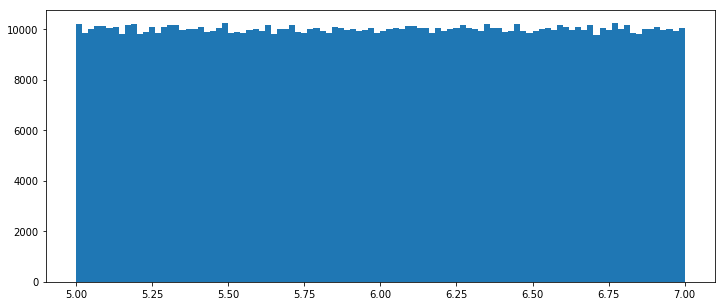

In [67]:
r = sp_uniform(loc=5,scale=2).rvs(size=1000*1000)

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.hist(r,  bins=100)
ax.legend(loc='best', frameon=False)

plt.show()

In [68]:
def geometric_sample(power_min, power_max, sample_size):
    dist = sp_uniform(loc=power_min, scale=power_max-power_min)
    return np.power(10, dist.rvs(size=sample_size))

geometric_sample(1,6,50)

array([  2.12755011e+04,   2.14512184e+05,   4.40596013e+01,
         3.97302037e+05,   1.23012328e+05,   6.72970607e+02,
         1.06861887e+05,   8.86695693e+05,   1.27846085e+03,
         7.31712408e+02,   7.00878443e+04,   3.95628316e+03,
         2.64805597e+02,   1.37541899e+03,   2.77952437e+04,
         8.30052398e+04,   7.98427204e+05,   4.95605710e+02,
         7.02851572e+04,   1.38405019e+01,   3.13570234e+04,
         3.46424277e+02,   2.94428885e+05,   4.50554341e+05,
         8.64205342e+01,   2.04184956e+02,   6.25269733e+01,
         2.18849104e+02,   6.19865361e+05,   4.10317140e+04,
         2.11998443e+02,   7.50672188e+03,   3.57816865e+01,
         7.79166639e+01,   8.20163358e+05,   3.53272608e+04,
         4.63795118e+05,   5.04137863e+04,   4.10856355e+01,
         3.85988824e+02,   8.43365359e+04,   1.42039364e+02,
         1.85617538e+02,   4.71273549e+02,   1.59225602e+01,
         4.35719879e+04,   4.69853518e+04,   1.89542308e+04,
         7.06045299e+05,

# Random Parameter Search
[RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

[Example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py)

In [70]:

from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline([('cvect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('sgdc', SGDClassifier( random_state=42 )),
                         ])

#ngram_range=(1,2), max_df = 0.8, min_df=2

param_dist = {"cvect__stop_words": [None,'english'],
              "cvect__ngram_range": [(1,1),(1,2)],
              "cvect__min_df": sp_randint(1, 6),
              "cvect__max_df": sp_uniform(loc=0.5, scale=0.5), # range is (loc, loc+scale)
              "tfidf__sublinear_tf": [True,False],
              "tfidf__norm": [None, 'l1', 'l2'],
              "sgdc__max_iter": sp_randint(5, 40),
              "sgdc__loss": ['hinge','log'],
              "sgdc__alpha": geometric_sample(-8,-3,10000),
              }

# n_iter - number of random models to evaluate
# n_jobs = -1 to run in parallel on all cores
# cv = 4 , 4-fold cross validation
# scoring='f1_macro' , averages the F1 for each target class

rs = RandomizedSearchCV(pipeline, param_distributions=param_dist,
                        n_iter=300, n_jobs=-1, cv=3, return_train_score=False, 
                        verbose=1, scoring='f1_macro', random_state=123)

test_pipeline(rs, verbose=False, name='Random Parameter Search')

Audio(url='./Beep 2.wav', autoplay=True)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:113

F1 = 0.861 
Accuracy = 0.866
time = 2409.200 sec.


In [71]:
#pd.get_option("display.max_columns")
pd.set_option("display.max_columns", 40)

header('Best')
display( pd.DataFrame.from_dict(rs.best_params_, orient= 'index') )

header('All Results')
df = pd.DataFrame(rs.cv_results_)
df = df.sort_values(['rank_test_score'])
display(df)

,0
cvect__max_df,0.809407
cvect__min_df,2
cvect__ngram_range,"(1, 2)"
cvect__stop_words,english
sgdc__alpha,4.1421e-05
sgdc__loss,hinge
sgdc__max_iter,8
tfidf__norm,l2
tfidf__sublinear_tf,True


,mean_fit_time,mean_score_time,mean_test_score,param_cvect__max_df,param_cvect__min_df,param_cvect__ngram_range,param_cvect__stop_words,param_sgdc__alpha,param_sgdc__loss,param_sgdc__max_iter,param_tfidf__norm,param_tfidf__sublinear_tf,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,std_fit_time,std_score_time,std_test_score
293,14.853246,3.539836,0.925724,0.809407,2,"(1, 2)",english,4.1421e-05,hinge,8,l2,True,"{'cvect__max_df': 0.809407046592, 'cvect__min_...",1,0.921983,0.928592,0.926599,0.216583,0.122902,0.002769
295,9.782719,2.325648,0.925010,0.90355,1,"(1, 1)",None,1.50148e-06,log,22,l2,True,"{'cvect__max_df': 0.903549769544, 'cvect__min_...",2,0.922144,0.925380,0.927511,0.732908,0.039005,0.002207
230,7.888557,2.566353,0.922371,0.985913,2,"(1, 1)",None,6.61096e-05,hinge,9,l2,True,"{'cvect__max_df': 0.985912703719, 'cvect__min_...",3,0.919342,0.924007,0.923767,0.135936,0.160630,0.002145
88,7.765061,1.846693,0.921875,0.624312,1,"(1, 1)",english,1.27023e-06,hinge,34,l1,True,"{'cvect__max_df': 0.624311883756, 'cvect__min_...",4,0.923891,0.917557,0.924180,0.154733,0.070410,0.003057
65,16.464689,3.134417,0.921320,0.97356,2,"(1, 2)",english,6.00844e-06,log,9,l2,True,"{'cvect__max_df': 0.973559769954, 'cvect__min_...",5,0.920750,0.922066,0.921145,0.577563,0.282636,0.000552
288,5.558814,1.648964,0.921156,0.832772,2,"(1, 1)",english,9.321e-06,log,13,l2,True,"{'cvect__max_df': 0.832772311676, 'cvect__min_...",6,0.918616,0.923130,0.921724,0.107093,0.049441,0.001887
146,8.228994,1.617907,0.920076,0.966044,2,"(1, 1)",english,1.66962e-08,log,27,l1,True,"{'cvect__max_df': 0.966044371522, 'cvect__min_...",7,0.916463,0.919146,0.924630,0.113104,0.080793,0.003398
49,6.389506,1.731148,0.918966,0.786073,3,"(1, 1)",english,3.00285e-05,hinge,20,l2,True,"{'cvect__max_df': 0.786073383992, 'cvect__min_...",8,0.913470,0.921708,0.921728,1.345013,0.161505,0.003889
15,23.916535,5.648267,0.918806,0.881384,3,"(1, 2)",None,5.22175e-06,log,13,l2,True,"{'cvect__max_df': 0.881383829716, 'cvect__min_...",9,0.917577,0.919857,0.918986,0.874003,0.377899,0.000940
29,20.019045,4.250037,0.918517,0.775796,3,"(1, 2)",None,1.34668e-06,log,6,l2,True,"{'cvect__max_df': 0.775796362991, 'cvect__min_...",10,0.916720,0.920090,0.918743,0.088623,0.076026,0.001385


# All Tests

In [72]:
tests_df=pd.DataFrame.from_dict(tests, orient= 'index')
tests_df = tests_df.drop(['Name'], axis=1)
tests_df.columns=[ 'F1', 'Accuracy', 'Time (sec.)', 'Details']
tests_df = tests_df.sort_values(by=['F1'], ascending=False)
display(tests_df)

header('Best Model')
display(tests_df.head(1))
print(tests_df['Details'].values[0])

,F1,Accuracy,Time (sec.),Details
char ngram 5 + sublinear_tf,0.869888,0.863004,74.409783,"{'memory': None, 'steps': [('cvect', CountVect..."
char ngram 4 + sublinear_tf,0.866702,0.859743,44.975314,"{'memory': None, 'steps': [('cvect', CountVect..."
Random Parameter Search,0.866437,0.861167,2409.200265,"{'cv': 3, 'error_score': 'raise', 'estimator__..."
ngram + sublinear_tf,0.865242,0.859321,14.576026,"{'memory': None, 'steps': [('cvect', CountVect..."
char ngram 6 + sublinear_tf,0.862985,0.856477,101.255888,"{'memory': None, 'steps': [('cvect', CountVect..."
sublinear_tf=True,0.859400,0.852128,7.349192,"{'memory': None, 'steps': [('cvect', CountVect..."
char ngram 7 + sublinear_tf,0.857541,0.851403,121.394230,"{'memory': None, 'steps': [('cvect', CountVect..."
"ngram_range=(1,2)",0.856213,0.850155,17.529066,"{'memory': None, 'steps': [('cvect', CountVect..."
max_features=10000,0.856213,0.850155,17.677771,"{'memory': None, 'steps': [('cvect', CountVect..."
"max_df = 0.8, min_df=3",0.856213,0.850155,17.304667,"{'memory': None, 'steps': [('cvect', CountVect..."


,F1,Accuracy,Time (sec.),Details
char ngram 5 + sublinear_tf,0.869888,0.863004,74.409783,"{'memory': None, 'steps': [('cvect', CountVect..."


{'memory': None, 'steps': [('cvect', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=2,
        ngram_range=(5, 5), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('tfidf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=True, use_idf=True)), ('sgdc', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=40, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False))], 'cvect': CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowe

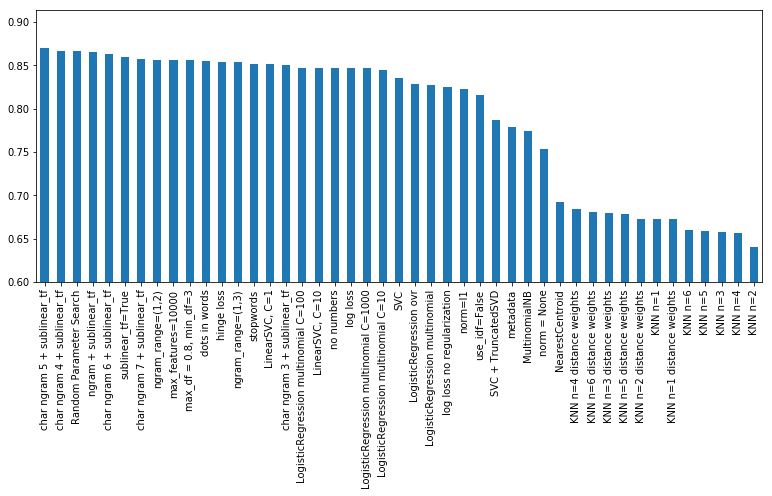

In [73]:
plt.figure(figsize=(13,5))
tests_df['F1'].plot(kind='bar', ylim=(0.6,None))